# Problem 1 : Predicting SalePrice using GrLivArea

Note : We observed during EDA that GrLivArea and SalePrice have a strong linear relationship with correlation 0.71.
In this problem, you will build a Linear Regression model to predict SalePrice using GrLivArea and judge its accuracy.

In [65]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.linear_model import LinearRegression

In [66]:
csv_data = pd.read_csv('train.csv', header = 0)

#### a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train set to predict SalePrice using GrLivArea. Print the coefficients of your model and plot the regression line.

(1168, 1)
(292, 1)
Intercept 	: b =  [29144.91051836]
Coefficients 	: a =  [[100.02259271]]


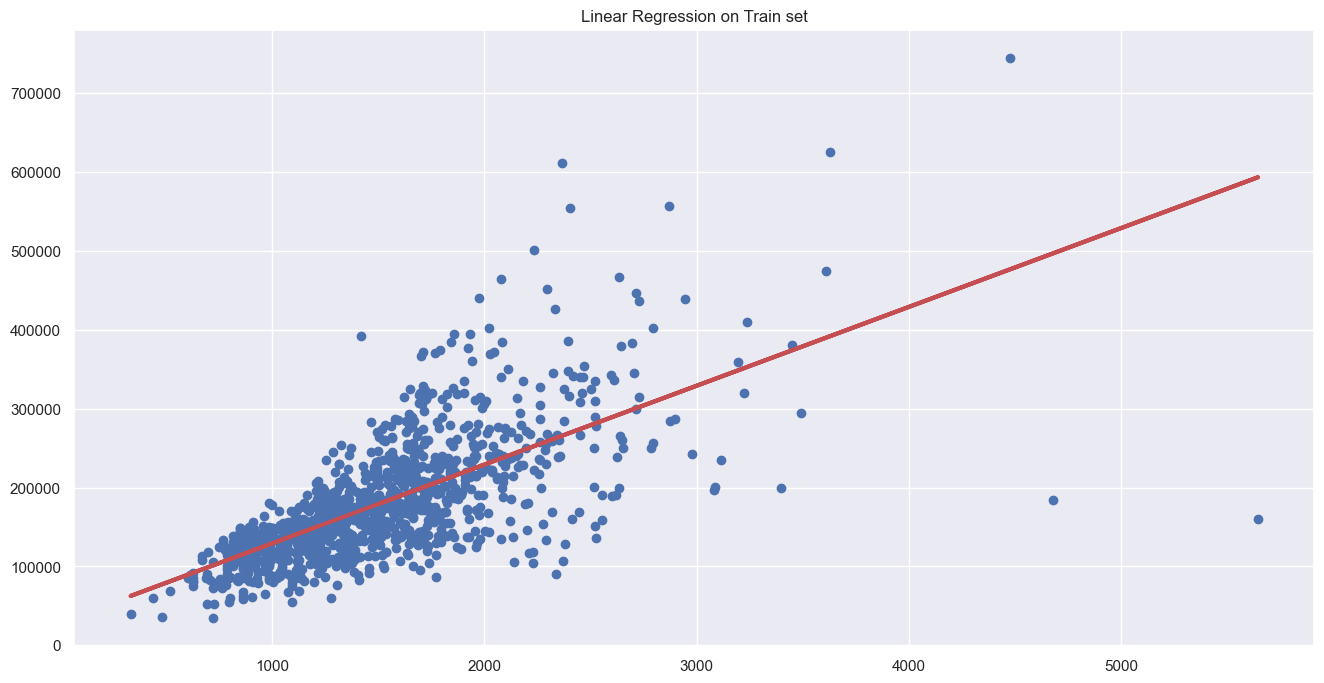

In [67]:
SalePrice = pd.DataFrame(csv_data['SalePrice']) # Response
GrLivArea = pd.DataFrame(csv_data['GrLivArea']) # Predictor
linreg = LinearRegression()

#80-20 Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(GrLivArea, SalePrice, test_size = 0.2)
linreg.fit(X_train, y_train)
print(X_train.shape)
print(y_test.shape)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Predict Total values corresponding to HP Train
y_train_pred = linreg.predict(X_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, color = "r", linewidth = 3)
plt.title("Linear Regression on Train set")
plt.show()


#### b) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Print the metrics for Goodness of Fit and Prediction Accuracy that you think are appropriate in each scenario.

In [68]:
print("Goodness of Fit metrics of the model on the Train set:")
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness of Fit metrics of the model on the Train set:
Explained Variance (R^2) 	: 0.46779589424855095
Mean Squared Error (MSE) 	: 3100243446.802824
Root Mean Squared Error (RMSE) 	: 55679.829802207765


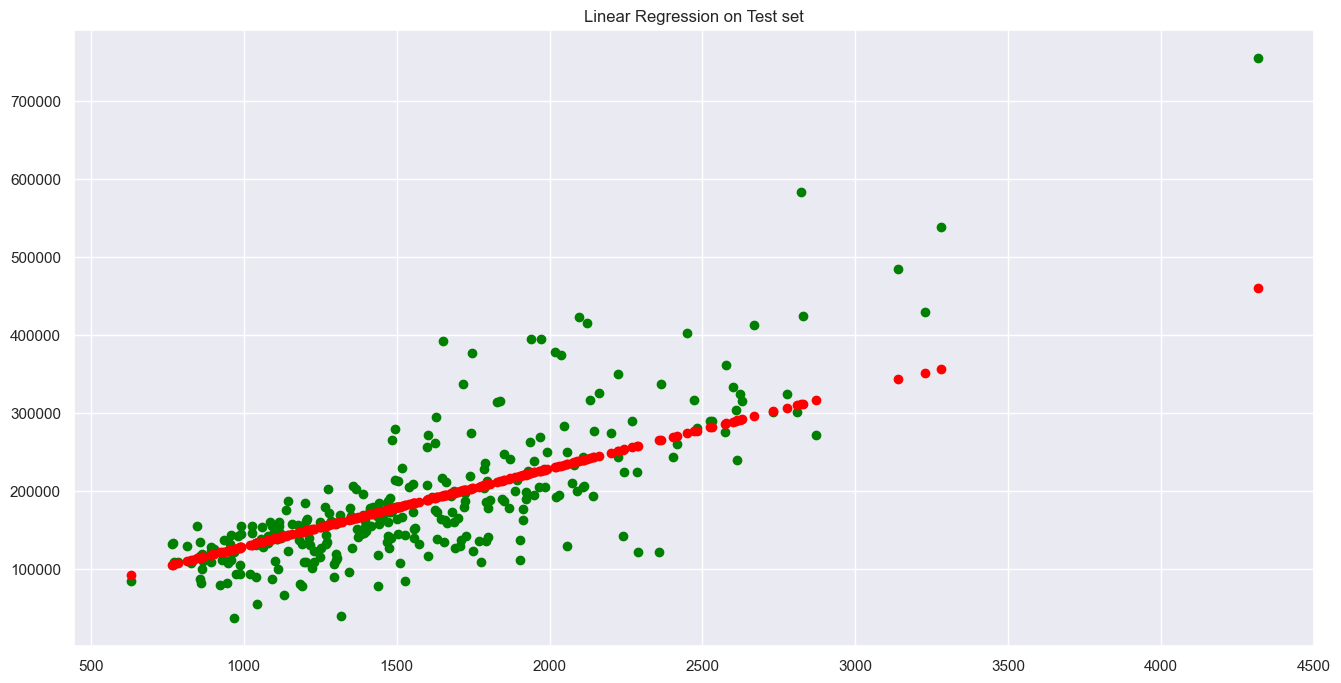

Prediction Accuracy of the model on the Test set
Explained Variance (R^2) 	: 0.5879411794450309
Mean Squared Error (MSE) 	: 3368136750.6705856
Root Mean Squared Error (RMSE) 	: 58035.650687061185


In [69]:
# Predict Total values corresponding to HP Test
y_test_pred = linreg.predict(X_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.title("Linear Regression on Test set")
plt.show()

print("Prediction Accuracy of the model on the Test set")
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

# Problem 2 : Predicting SalePrice using Other Variables

Following the steps from the previous problem, build two new uni-variate Linear Regression models to predict SalePrice
using the variables TotalBsmtSF and GarageArea, individually. Justify which of the three models is the best in this case

Intercept of Regression 	: b =  [65528.09863857]
Coefficients of Regression 	: a =  [[109.46506911]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.36301593541032473
Mean Squared Error (MSE) 	: 4061599277.664091

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4329014594552656
Mean Squared Error (MSE) 	: 3418855870.6557026



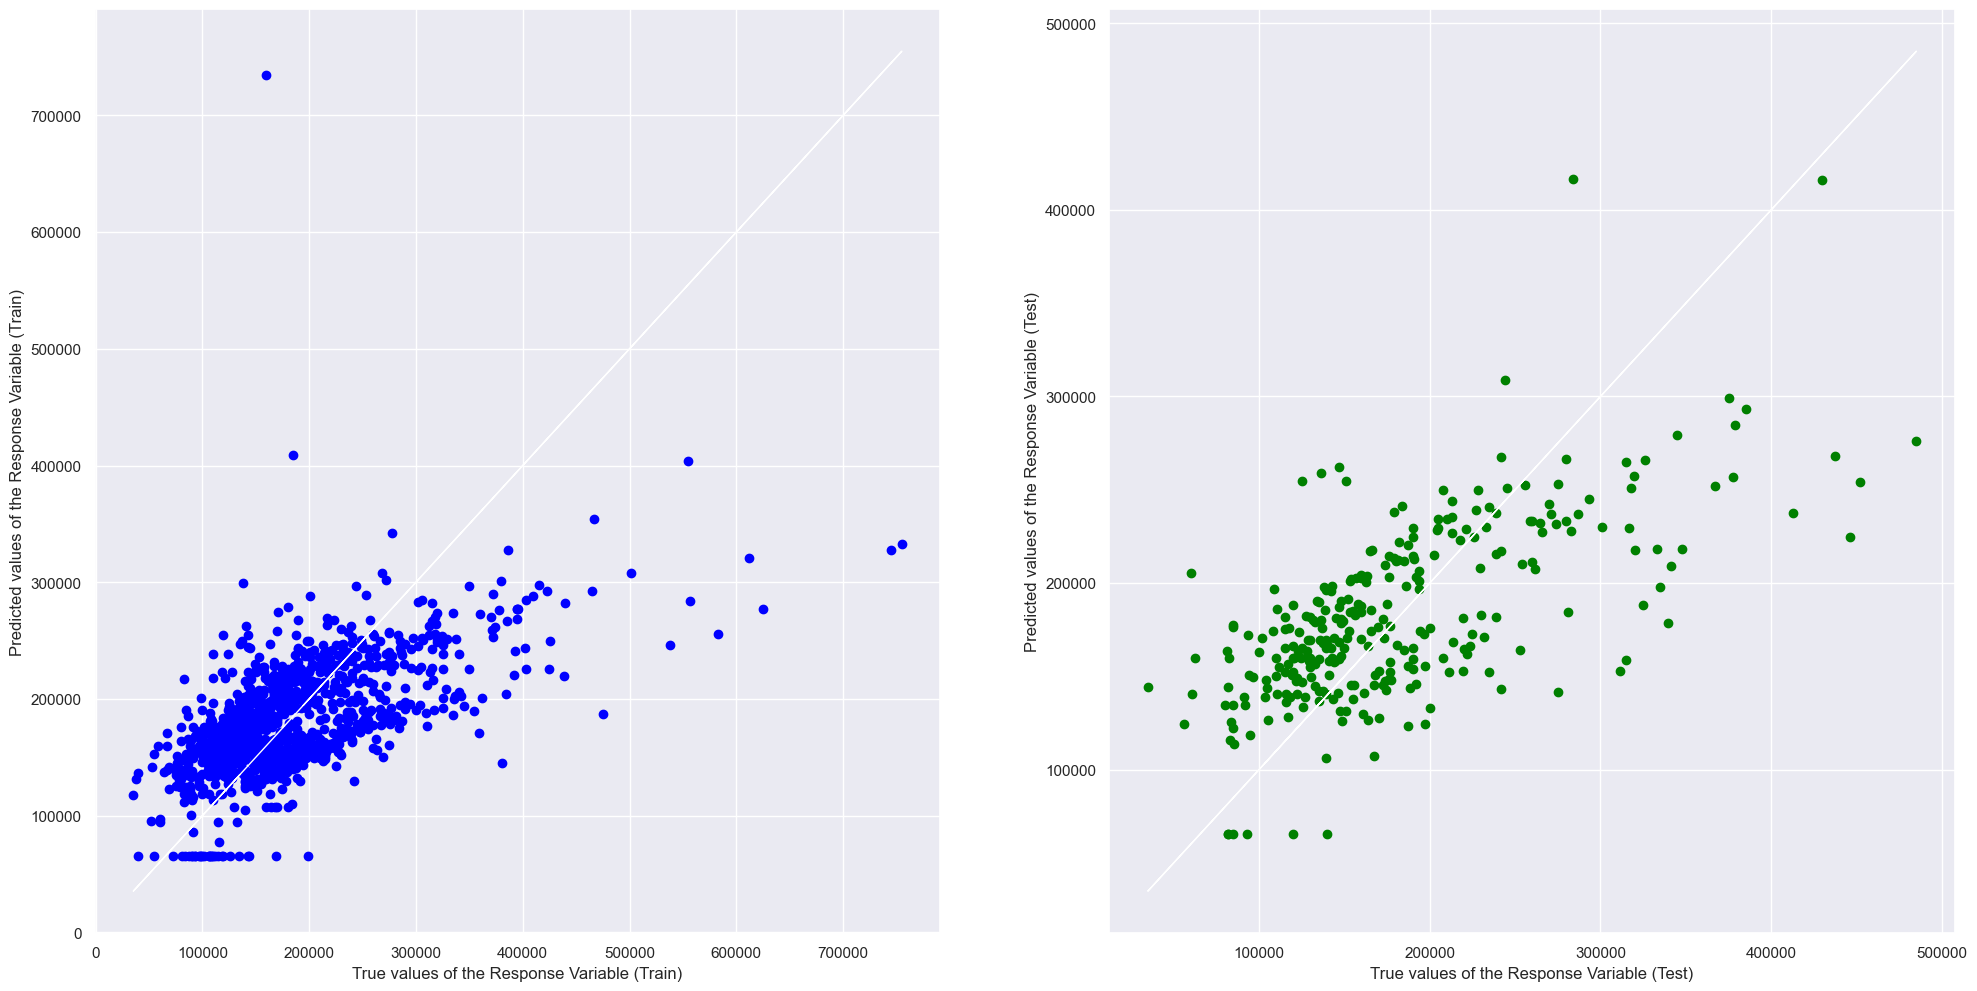

In [91]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the Total-HP Dataset
SalePrice = pd.DataFrame(csv_data['SalePrice'])
TotalBsmtSF = pd.DataFrame(csv_data['TotalBsmtSF'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(TotalBsmtSF, SalePrice, test_size = 0.2)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Intercept of Regression 	: b =  [71076.12807274]
Coefficients of Regression 	: a =  [[229.36324563]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3831632522404753
Mean Squared Error (MSE) 	: 3816958934.414444

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4047792781994367
Mean Squared Error (MSE) 	: 4020360605.1900635



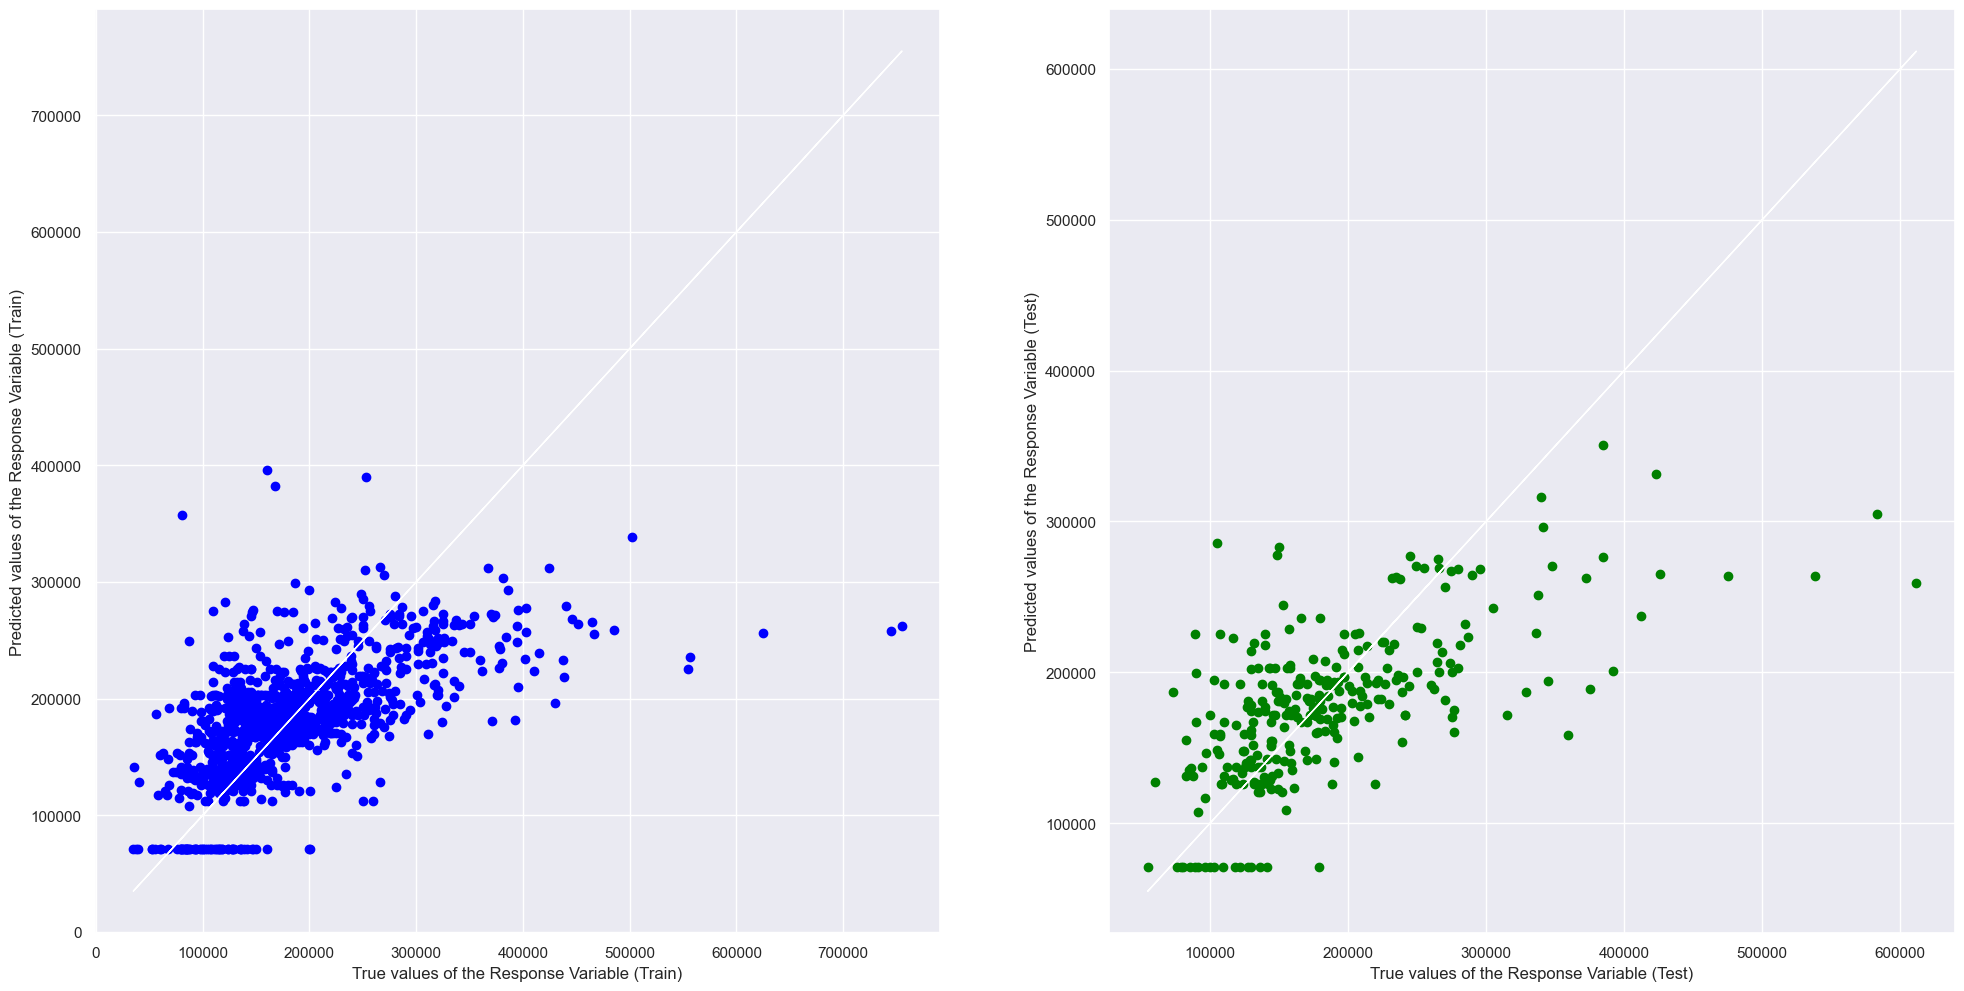

In [92]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the Total-HP Dataset
SalePrice = pd.DataFrame(csv_data['SalePrice'])
GarageArea = pd.DataFrame(csv_data['GarageArea'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(GarageArea, SalePrice, test_size = 0.2)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

The best linear regression model is using the variable TotalBsmtSF as the explained variance is closer to 1 than using GarageArea, thus the predicted values using TotalBsmtSF is more closer to the actual test data, thus the better one

# Problem 3 : Refining the Models to Predict SalePrice

In this problem, you will consider finer details of the dataset and the variables to refine the model to predict SalePrice.

#### (a) Find the houses (rows) that are “outliers” for GrLivArea and/or SalePrice. This means outliers for GrLivArea UNION outliers for SalePrice in a set notation. Remove all these “outliers” from the dataset so that it is clean.

25th Percentile:  GrLivArea    1129.5
75th Percentile:  GrLivArea    1776.75
GrLivArea has GrLivArea    31 outliers

         GrLivArea
count  1460.000000
mean   1515.463699
std     525.480383
min     334.000000
25%    1129.500000
50%    1464.000000
75%    1776.750000
max    5642.000000
25th Percentile:  SalePrice    129975.0
75th Percentile:  SalePrice    214000.0
SalePrice has SalePrice    61 outliers

           SalePrice
count    1460.000000
mean   180921.195890
std     79442.502883
min     34900.000000
25%    129975.000000
50%    163000.000000
75%    214000.000000
max    755000.000000


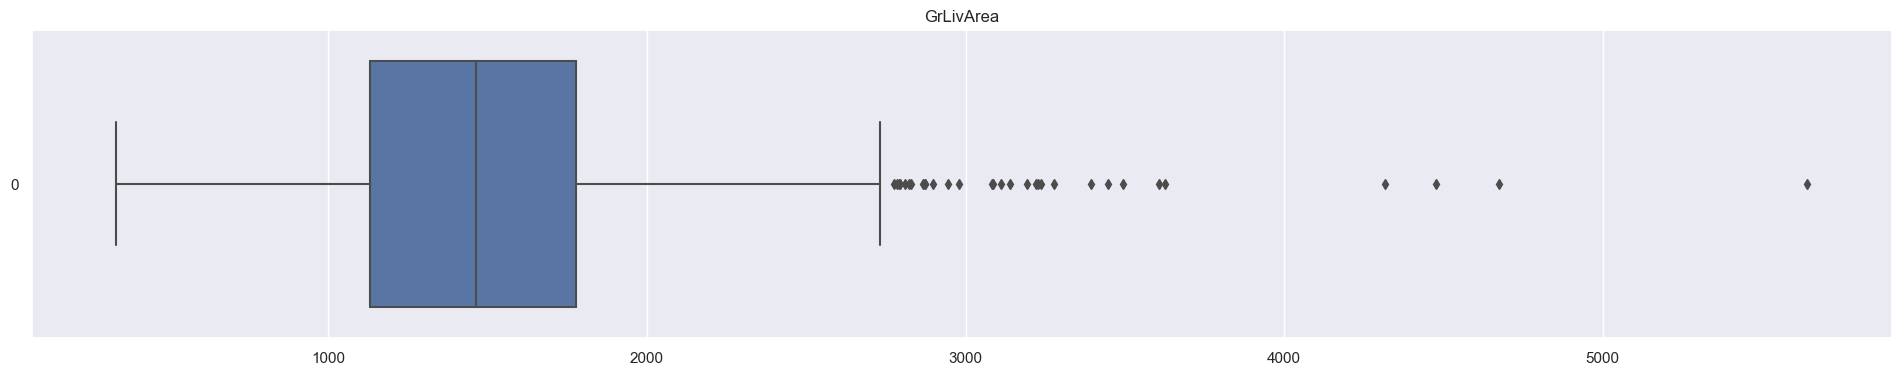

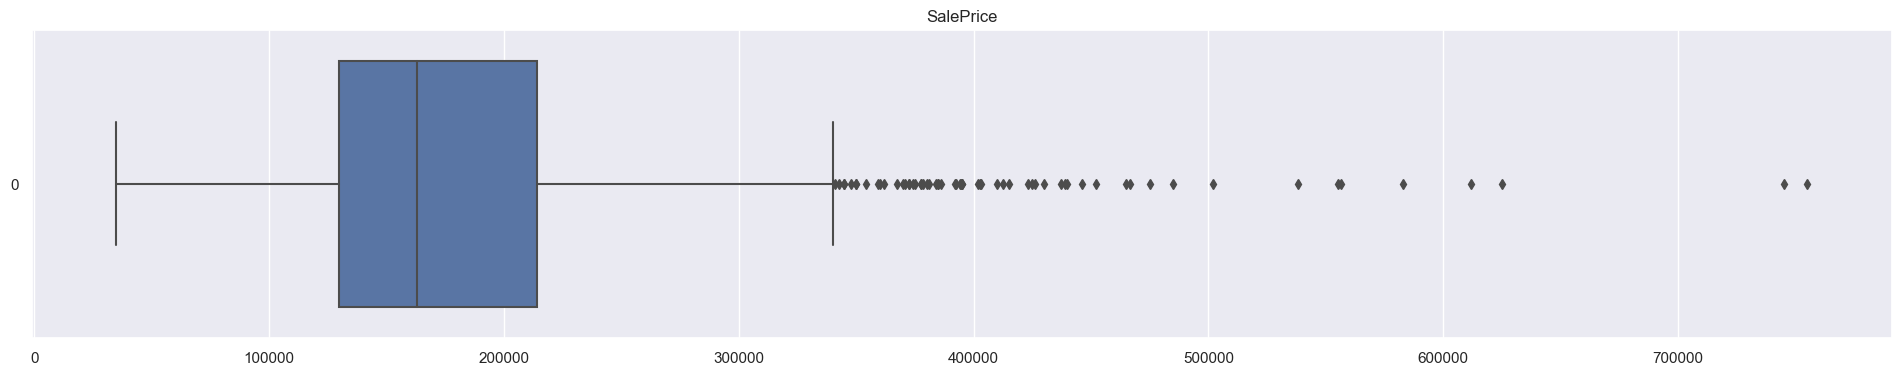

In [93]:
df = pd.DataFrame(csv_data['GrLivArea'])
Q1 = df.quantile(0.25); Q3 = df.quantile(0.75); IQR = Q3 - Q1;
print("25th Percentile: ",Q1.to_string()); print("75th Percentile: ",Q3.to_string())
print("GrLivArea has",((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum().to_string(),"outliers\n")
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = csv_data["GrLivArea"], orient = "h")
plt.title("GrLivArea")
# Show all rows
# pd.set_option('display.max_rows', df.shape[0]+1)
print(df.describe())

df = pd.DataFrame(csv_data['SalePrice'])
Q1 = df.quantile(0.25); Q3 = df.quantile(0.75); IQR = Q3 - Q1;
print("25th Percentile: ",Q1.to_string()); print("75th Percentile: ",Q3.to_string())
print("SalePrice has",((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum().to_string(),"outliers\n")
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = csv_data["SalePrice"], orient = "h")
plt.title("SalePrice")
print(df.describe())

25th Percentile:  GrLivArea    1116.5
75th Percentile:  GrLivArea    1719.5
SalePrice has GrLivArea    8 outliers

         GrLivArea
count  1383.000000
mean   1453.518438
std     434.424442
min     334.000000
25%    1116.500000
50%    1431.000000
75%    1719.500000
max    2730.000000
25th Percentile:  SalePrice    128500.0
75th Percentile:  SalePrice    202150.0
SalePrice has SalePrice    37 outliers

           SalePrice
count    1383.000000
mean   169306.211858
std     58693.656943
min     34900.000000
25%    128500.000000
50%    158500.000000
75%    202150.000000
max    340000.000000


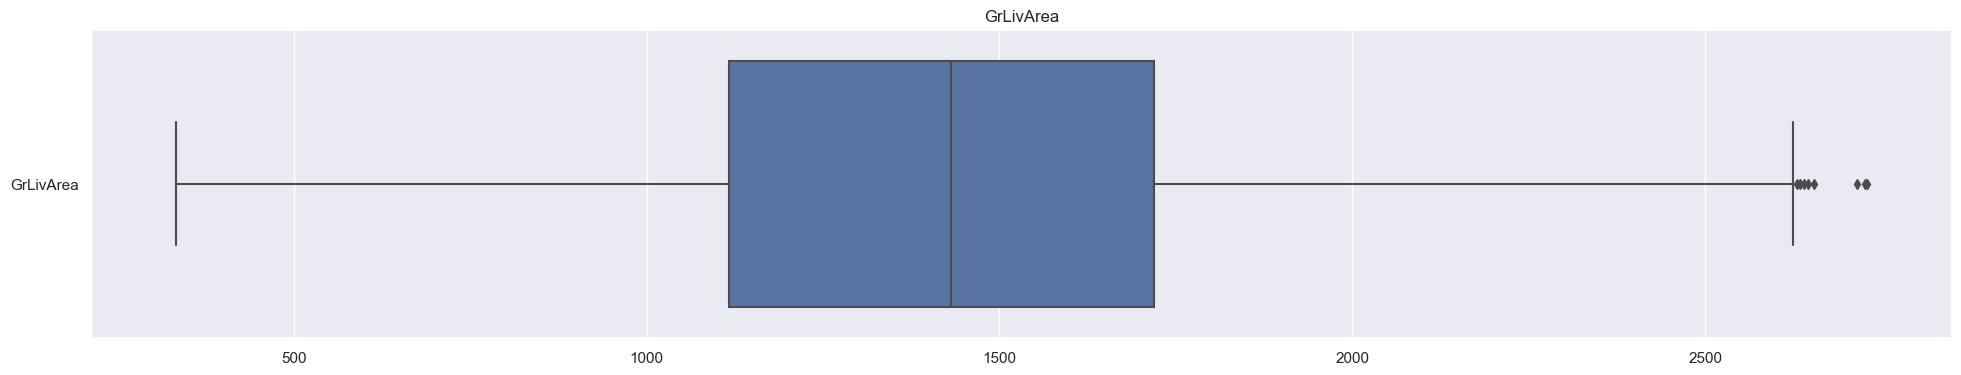

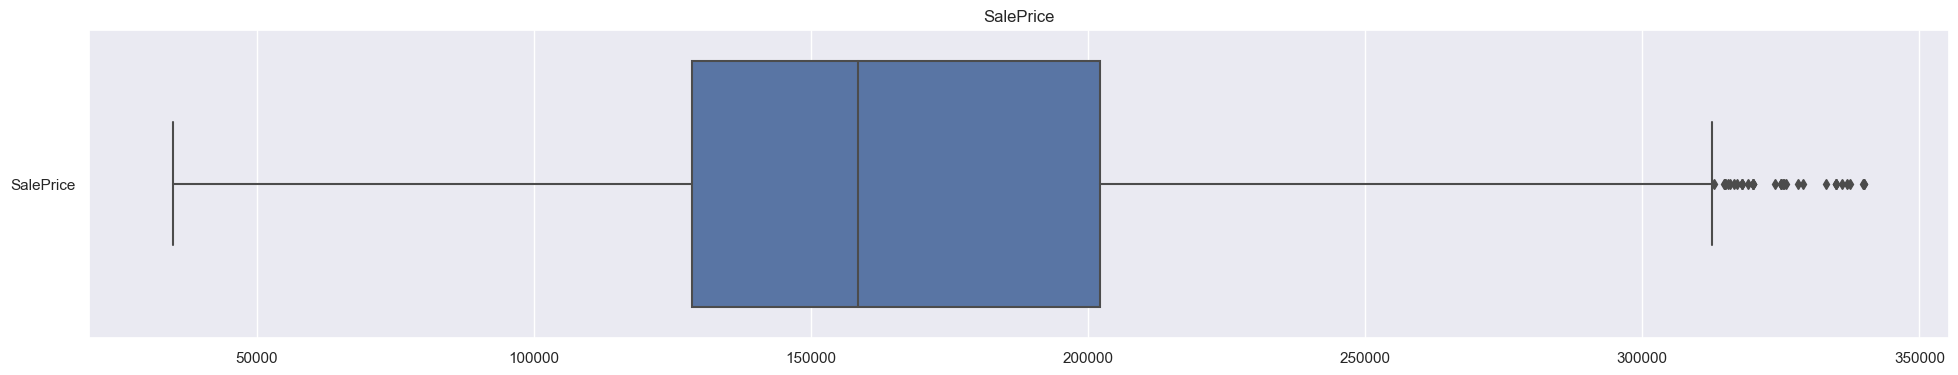

In [94]:
df = pd.DataFrame(csv_data)

cols = ['GrLivArea', 'SalePrice'] # one or more

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

gr = pd.DataFrame(df['GrLivArea'])
Q1 = gr.quantile(0.25); Q3 = gr.quantile(0.75); IQR = Q3 - Q1;
print("25th Percentile: ",Q1.to_string()); print("75th Percentile: ",Q3.to_string())
print("SalePrice has",((gr < (Q1 - 1.5 * IQR)) | (gr > (Q3 + 1.5 * IQR))).sum().to_string(),"outliers\n")
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = gr, orient = "h")
plt.title("GrLivArea")
print(gr.describe())

sp = pd.DataFrame(df['SalePrice'])
Q1 = sp.quantile(0.25); Q3 = sp.quantile(0.75); IQR = Q3 - Q1;
print("25th Percentile: ",Q1.to_string()); print("75th Percentile: ",Q3.to_string())
print("SalePrice has",((sp < (Q1 - 1.5 * IQR)) | (sp > (Q3 + 1.5 * IQR))).sum().to_string(),"outliers\n")
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = sp, orient = "h")
plt.title("SalePrice")
print(sp.describe())

#### (b) In the outlier-free dataset, create Train and Test sets with an 80:20 ratio, and fit a Linear Regression model on the Train set to predict SalePrice using GrLivArea. Print the model coefficients and plot the regression line.


Intercept of Regression 	: b =  [34928.55326641]
Coefficients of Regression 	: a =  [[92.24291226]]



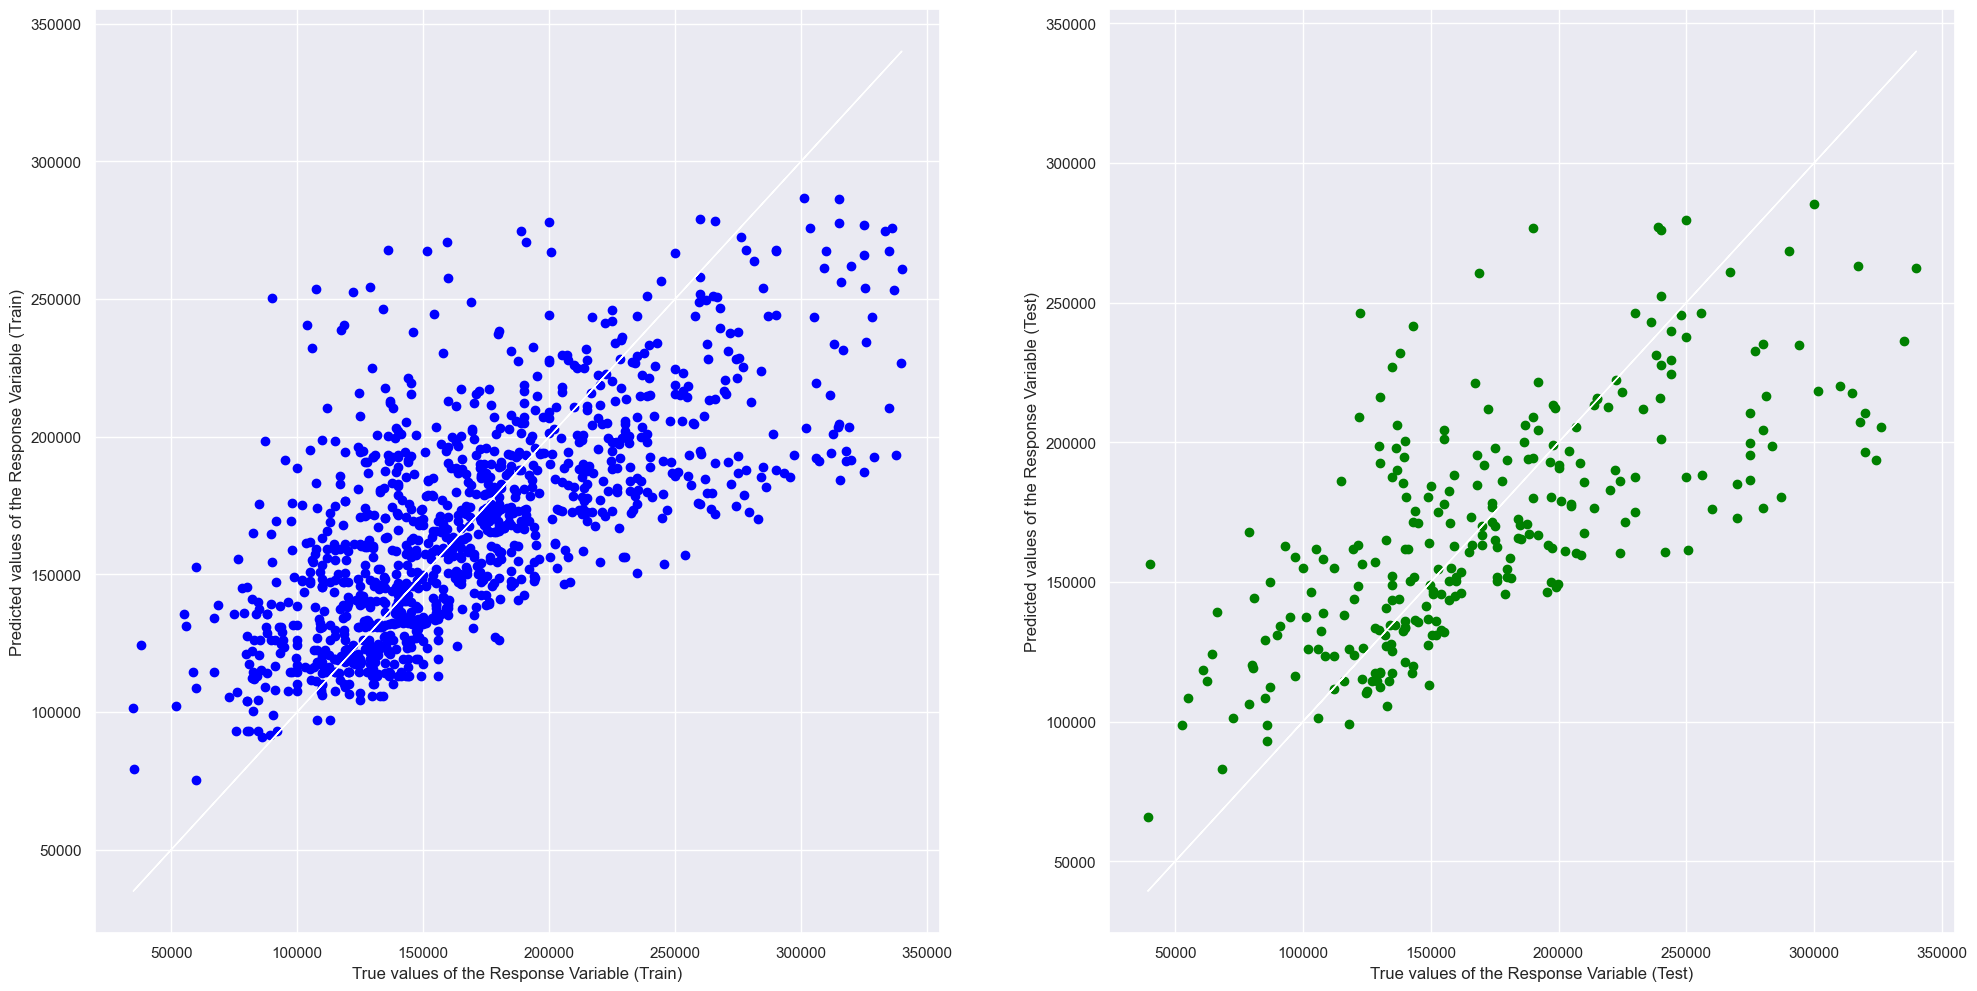

In [95]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the Total-HP Dataset
SalePrice = pd.DataFrame(df['SalePrice'])
GrLivArea = pd.DataFrame(df['GrLivArea'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(GrLivArea, SalePrice, test_size = 0.2)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### (c) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Do you think this model is better than the model obtained in Problem 1 for the same variables? Briefly justify.

In [96]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.47061073000451026
Mean Squared Error (MSE) 	: 1769892890.0056863

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.49923996293413764
Mean Squared Error (MSE) 	: 1919049801.7867827



No, as the Explained variance R^2 is higher in the model from Problem 1 than in this problem. Thus the model from Problem 1 is more close to the actual test data using the linear regression model, thus is better.